________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

<h1 style="text-align: center">HappinessScore</h1>
<h2 style="text-align: center">Projet de Charles Vin et Lina Lokmane</h2>

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from fonction_utile import *

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

<div style="text-align: center; font-size: Large">Arrangement de la DataFrame</div>

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium">J'ai unifié les noms des colonnes dans les différents fichiers, dans le but de travailler sur une seule dataframe qui résumera toutes les données obtenues entre 2015-2019.</div>

In [2]:
dataOverYears = list()
for i in ["2015","2016","2017","2018","2019"]:
    dataOverYears.append(pd.read_csv(i+".csv", index_col="Overall rank"))

df = pd.concat([dataOverYears[0],dataOverYears[1],dataOverYears[2],dataOverYears[3],dataOverYears[4]], keys=["2015","2016","2017","2018","2019"])
df

Country  Dystopia Residual  \
     Overall rank                                                
2015 1                          Switzerland            2.51738   
     2                              Iceland            2.70201   
     3                              Denmark            2.49204   
     4                               Norway            2.46531   
     5                               Canada            2.45176   
...                                     ...                ...   
2019 152                             Rwanda                NaN   
     153                           Tanzania                NaN   
     154                        Afghanistan                NaN   
     155           Central African Republic                NaN   
     156                        South Sudan                NaN   

                   Economy (GDP per Capita)  Freedom  Generosity  \
     Overall rank                                                  
2015 1                              1.39651  0.66557     0.29678   
     2                              1.30232  0.62877     0.43630   
     3                              1.32548  0.64938     0.34139   
     4                              1.45900  0.66973     0.34699   
     5                              1.32629  0.63297     0.45811   
...                                     ...      ...         ...   
2019 152                            0.35900  0.55500     0.21700   
     153                            0.47600  0.41700     0.27600   
     154                            0.35000  0.00000     0.15800   
     155                            0.02600  0.22500     0.23500   
     156                            0.30600  0.01000     0.20200   

                   Health (Life Expectancy)  Lower Confidence Interval  \
     Overall rank                                                        
2015 1                              0.94143                        NaN   
     2                              0.94784                        NaN   
     3                              0.87464                        NaN   
     4                              0.88521                        NaN   
     5                              0.90563                        NaN   
...                                     ...                        ...   
2019 152                            0.61400                        NaN   
     153                            0.49900                        NaN   
     154                            0.36100                        NaN   
     155                            0.10500                        NaN   
     156                            0.29500                        NaN   

                   Perceptions of corruption          Region  Score  \
     Overall rank                                                     
2015 1                               0.41978  Western Europe  7.587   
     2                               0.14145  Western Europe  7.561   
     3                               0.48357  Western Europe  7.527   
     4                               0.36503  Western Europe  7.522   
     5                               0.32957   North America  7.427   
...                                      ...             ...    ...   
2019 152                             0.41100             NaN  3.334   
     153                             0.14700             NaN  3.231   
     154                             0.02500             NaN  3.203   
     155                             0.03500             NaN  3.083   
     156                             0.09100             NaN  2.853   

                   Social support  Standard Error  Upper Confidence Interval  \
     Overall rank                                                              
2015 1                    1.34951         0.03411                        NaN   
     2                    1.40223         0.04884                        NaN   
     3                    1.36058         0.03328                        NaN   
     

________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium"> Supprimons les colonnes qui nous informent sur les marges d'erreurs, ou qui ne nous intéresse pas. </div>

________________________________________________________________________________________________________________

In [3]:
df = df.drop(columns=["Standard Error","Upper Confidence Interval","Lower Confidence Interval","Whisker.high","Whisker.low", "Dystopia Residual"])

________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium">Remplissons les régions manquantes.</div>

________________________________________________________________________________________________________________

J'ai d'abord commencé par aller rechercher les régions des pays dans le fichier de 2015, mais avec les différences de pays il y avait toujours des trous. J'ai donc commencé à chercher les regions manquantes avec une API, mais les noms de régions du fichier de 2015 sont regroupés/diffèrents.

J'ai donc décidé d'aller chercher les régions de chaque pays avec l'API pour avoir des noms unifiés.

In [4]:
newRegions = list()
subRegions = list()
notFound = set()
d = importRegion() #J'ai sauvegardé les régions pour éviter de spamer l'API
for pays in df["Country"]:
    if pays in d.keys():
        newRegions.append(d[pays][0])
        subRegions.append(d[pays][1])
    else:
        response = requests.get("https://restcountries.eu/rest/v2/name/{}".format(pays)).json()
        try:
            d[pays] = [response[0]["region"], response[0]["subregion"]]
            subRegions.append(response[0]["subregion"])
            newRegions.append(response[0]["region"])
        except:
            notFound.add(pays)
            newRegions.append("missing")
            subRegions.append("missing")
df['Region'] = newRegions
df['Subregion'] = subRegions
print("Pays non trouvés:", notFound)

Pays non trouvés: {'Congo (Kinshasa)', 'Taiwan Province of China', 'Congo (Brazzaville)', 'Somaliland region', 'North Macedonia', 'Somaliland Region', 'South Korea', 'Palestinian Territories', 'Hong Kong S.A.R., China', 'Northern Cyprus', 'North Cyprus', 'Trinidad & Tobago'}


________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium">Une petite section qui fait la moyenne de toutes les colonnes à travers le temps.</div>

________________________________________________________________________________________________________________

In [5]:
moyenne = pd.pivot_table(df, columns="Country").transpose()
moyenne.sort_values(by="Score", ascending=False, inplace=True)

In [6]:
newRegions = list()
subRegions = list()
for pays in moyenne.index:
    if pays in d.keys():
        newRegions.append(d[pays][0])
        subRegions.append(d[pays][1])
    else:
        newRegions.append("missing")
        subRegions.append("missing")
moyenne['Region'] = newRegions
moyenne['Subregion'] = subRegions
moyenne = moyenne.reset_index()
moyenne

,Country,Economy (GDP per Capita),Freedom,Generosity,Health (Life Expectancy),Perceptions of corruption,Score,Social support,Region,Subregion
0,Denmark,1.396729,0.625959,0.318876,0.865249,0.429374,7.54600,1.447688,Europe,Northern Europe
1,Norway,1.519381,0.638049,0.328990,0.873333,0.343951,7.54100,1.431075,Europe,Northern Europe
2,Finland,1.356960,0.621536,0.217783,0.873836,0.398474,7.53780,1.434429,Europe,Northern Europe
3,Switzerland,1.472164,0.620642,0.277432,0.928318,0.379763,7.51140,1.417332,Europe,Western Europe
4,Iceland,1.386523,0.618035,0.419124,0.917744,0.140145,7.51100,1.492813,Europe,Northern Europe
...,...,...,...,...,...,...,...,...,...,...
165,Rwanda,0.322057,0.581611,0.226311,0.417543,0.473468,3.43860,0.788453,Africa,Eastern Africa
166,South Sudan,0.358547,0.116421,0.242665,0.198324,0.110986,3.38250,0.492378,Africa,Middle Africa
167,Syria,0.699109,0.081700,0.431285,0.566281,0.159547,3.29220,0.355931,Asia,Western Asia
168,Central African Republic,0.032125,0.322408,0.243057,0.050191,0.053114,3.13425,0.000000,Africa,Middle Africa


________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium">Créons une variable qualitative à l'aide de la fonction cut()</div>

________________________________________________________________________________________________________________

In [7]:
df["Happiness"] = pd.cut(df["Score"], 4, labels=["Really Unhappy","Unhappy", "Happy", "Really Happy"])
moyenne["Happiness"] = pd.cut(moyenne["Score"], 4, labels=["Really Unhappy","Unhappy", "Happy", "Really Happy"])
moyenne

,Country,Economy (GDP per Capita),Freedom,Generosity,Health (Life Expectancy),Perceptions of corruption,Score,Social support,Region,Subregion,Happiness
0,Denmark,1.396729,0.625959,0.318876,0.865249,0.429374,7.54600,1.447688,Europe,Northern Europe,Really Happy
1,Norway,1.519381,0.638049,0.328990,0.873333,0.343951,7.54100,1.431075,Europe,Northern Europe,Really Happy
2,Finland,1.356960,0.621536,0.217783,0.873836,0.398474,7.53780,1.434429,Europe,Northern Europe,Really Happy
3,Switzerland,1.472164,0.620642,0.277432,0.928318,0.379763,7.51140,1.417332,Europe,Western Europe,Really Happy
4,Iceland,1.386523,0.618035,0.419124,0.917744,0.140145,7.51100,1.492813,Europe,Northern Europe,Really Happy
...,...,...,...,...,...,...,...,...,...,...,...
165,Rwanda,0.322057,0.581611,0.226311,0.417543,0.473468,3.43860,0.788453,Africa,Eastern Africa,Really Unhappy
166,South Sudan,0.358547,0.116421,0.242665,0.198324,0.110986,3.38250,0.492378,Africa,Middle Africa,Really Unhappy
167,Syria,0.699109,0.081700,0.431285,0.566281,0.159547,3.29220,0.355931,Asia,Western Asia,Really Unhappy
168,Central African Republic,0.032125,0.322408,0.243057,0.050191,0.053114,3.13425,0.000000,Africa,Middle Africa,Really Unhappy


________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

<div style="text-align: center; font-size: large">Exploitation des données.<div/>

________________________________________________________________________________________________________________
________________________________________________________________________________________________________________

<div style="font-size: medium">Après ce réarangement de la DataBase, nous allons enfin pouvoir l'exploiter :D 

________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium">Généralité</div>

________________________________________________________________________________________________________________

In [8]:
moyenne["Score"].describe()

count    170.000000
mean       5.380388
std        1.099061
min        3.079000
25%        4.466050
50%        5.334300
75%        6.163150
max        7.546000
Name: Score, dtype: float64

Le Happiness Score oscille entre 3.079 et 7.546

________________________________________________________________________________________________________________

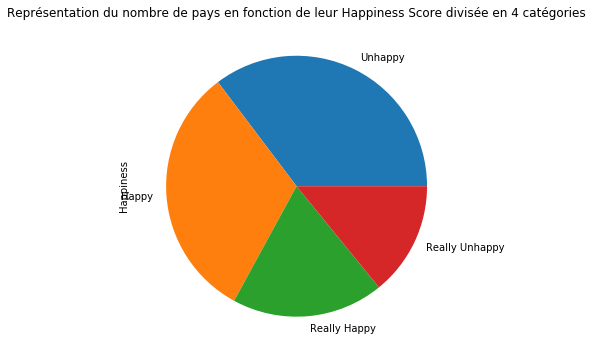

In [9]:
moyenne["Happiness"].value_counts().plot.pie(title="Représentation du nombre de pays en fonction de leur Happiness Score divisée en 4 catégories", figsize=(6,6))

Ces datas nous montrent une répartion globalement équilibrée entre les pays. Les extrêmes (Très heureux/Très malheureux) ont presque la même proportion, même si la balance penche pour les pays heureux :)  

In [10]:
topExemple(moyenne.sort_values("Score"), nb=10)

,Country,Economy (GDP per Capita),Freedom,Generosity,Health (Life Expectancy),Perceptions of corruption,Score,Social support,Region,Subregion,Happiness
169,Burundi,0.062447,0.101320,0.185921,0.211608,0.106992,3.07900,0.470817,Africa,Eastern Africa,Really Unhappy
168,Central African Republic,0.032125,0.322408,0.243057,0.050191,0.053114,3.13425,0.000000,Africa,Middle Africa,Really Unhappy
167,Syria,0.699109,0.081700,0.431285,0.566281,0.159547,3.29220,0.355931,Asia,Western Asia,Really Unhappy
166,South Sudan,0.358547,0.116421,0.242665,0.198324,0.110986,3.38250,0.492378,Africa,Middle Africa,Really Unhappy
165,Rwanda,0.322057,0.581611,0.226311,0.417543,0.473468,3.43860,0.788453,Africa,Eastern Africa,Really Unhappy
164,Tanzania,0.439777,0.386880,0.311749,0.396732,0.083699,3.46600,0.939380,Africa,Eastern Africa,Really Unhappy
163,Afghanistan,0.357113,0.117924,0.267730,0.254707,0.058094,3.51280,0.409753,Asia,Southern Asia,Really Unhappy
162,Togo,0.265871,0.363747,0.174775,0.288529,0.100969,3.54420,0.323567,Africa,Western Africa,Really Unhappy
161,Yemen,0.489313,0.244175,0.096929,0.365440,0.067045,3.62580,0.865448,Asia,Western Asia,Really Unhappy
160,Madagascar,0.265918,0.177375,0.193293,0.434105,0.062706,3.74540,0.773236,Africa,Eastern Africa,Really Unhappy


On constate naturellement que les pays les moins heureux sont également les plus pauvres.

In [11]:
tri = moyenne[moyenne["Score"] < 5]
getRegionData(tri, "Europe", numeric=False)

,Country,Economy (GDP per Capita),Freedom,Generosity,Health (Life Expectancy),Perceptions of corruption,Score,Social support,Subregion,Happiness
Region,,,,,,,,,,
Europe,Albania,0.938633,0.371898,0.167887,0.787696,0.043201,4.7126,0.754931,Southern Europe,Unhappy
Europe,Bulgaria,1.086536,0.295458,0.101064,0.735954,0.007784,4.6186,1.298788,Eastern Europe,Unhappy
Europe,Ukraine,0.835918,0.168759,0.200088,0.636817,0.018386,4.3072,1.282890,Eastern Europe,Unhappy


Seulement trois pays en Europe  ont un score en dessous de 5, l'Ukraine est visiblement la moins heureuse.

________________________________________________________________________________________________________________

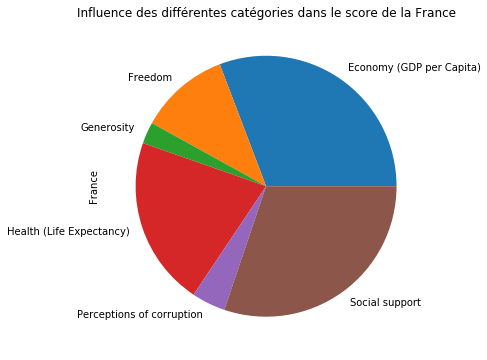

In [25]:
getCountryData(moyenne,"France").drop("Score").plot.pie(figsize=(6,6), title="Influence des différentes catégories dans le score de la France")

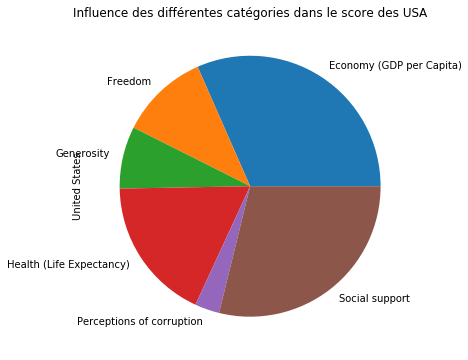

In [13]:
getCountryData(moyenne,"United States").drop("Score").plot.pie(figsize=(6,6), title="Influence des différentes catégories dans le score des USA")

Ici on peut se poser la question si l'influence du facteur Health est plus grand en France grâce au système de santé français en comparaison avec les USA? 

________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium"> Evolution dans le temps</div>

________________________________________________________________________________________________________________

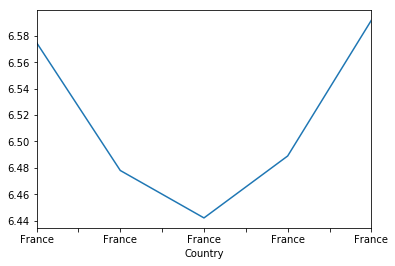

In [26]:
scoreOverTime = getCountryData(df,"France")["Score"]
scoreOverTime.plot()

A priori rien d'intéressant, le score varie peu

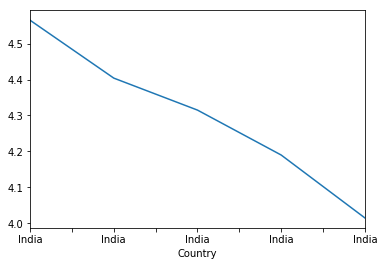

In [15]:
scoreOverTime = getCountryData(df, "India")["Score"]
scoreOverTime.plot()

Mais l'Inde a chuté ces dernières années, malgrès un développement économique fort ?
Observons quels paramètres ont influencé cette baisse.

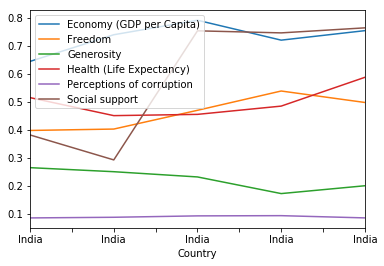

In [16]:
getCountryData(df, "India").drop(columns="Score").plot()

Ils ne sont visiblement pas répertoriés. En effet, le site du HappinessScore indique que tous les paramètres ne sont pas indiqués.

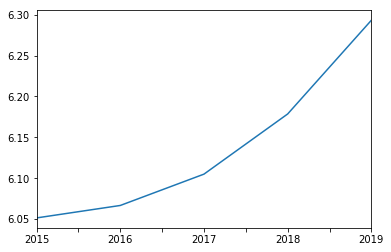

In [27]:
l = list()
for i in ["2015","2016","2017","2018","2019"]:
    l.append(getRegionData(df.loc[i], "Europe")["Score"].mean())
    
pd.Series(l, index=["2015","2016","2017","2018","2019"]).plot()

On constate une hausse relativement élevée en Europe.

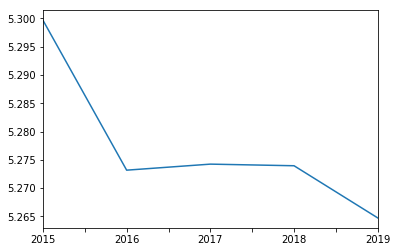

In [18]:
l = list()
for i in ["2015","2016","2017","2018","2019"]:
    l.append(getRegionData(df.loc[i], "Asia")["Score"].mean())
    
pd.Series(l, index=["2015","2016","2017","2018","2019"]).plot()

L'Asie stagne globalement.

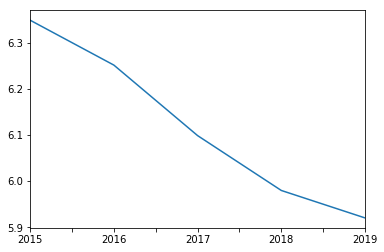

In [19]:
l = list()
for i in ["2015","2016","2017","2018","2019"]:
    l.append(getRegionData(df.loc[i], "South America", subregion=True)["Score"].mean())
    
pd.Series(l, index=["2015","2016","2017","2018","2019"]).plot()

Par contre l'Amérique du Sud montre une baisse.

________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium">Pays le plus riche "GPD", pas forcement très heureux ?</div>

________________________________________________________________________________________________________________

In [20]:
topExemple(moyenne.sort_values("Economy (GDP per Capita)", ascending=False), nb=10)

,Country,Economy (GDP per Capita),Freedom,Generosity,Health (Life Expectancy),Perceptions of corruption,Score,Social support,Region,Subregion,Happiness
33,Qatar,1.743691,0.604064,0.291217,0.768732,0.355974,6.4218,1.169707,Asia,Western Asia,Happy
21,United Arab Emirates,1.645227,0.538813,0.267826,0.752196,0.311982,6.7442,1.069860,Asia,Western Asia,Really Happy
16,Luxembourg,1.637675,0.583832,0.245846,0.903490,0.337421,6.9360,1.343241,Europe,Western Europe,Really Happy
26,Singapore,1.592138,0.553412,0.303215,1.014186,0.467256,6.5428,1.231079,Asia,South-Eastern Asia,Really Happy
43,Kuwait,1.555662,0.505998,0.171844,0.695143,0.182188,6.1486,1.184644,Asia,Western Asia,Happy
78,"Hong Kong S.A.R., China",1.551675,0.490969,0.374466,0.943062,0.293934,5.4720,1.262791,missing,missing,Happy
1,Norway,1.519381,0.638049,0.328990,0.873333,0.343951,7.5410,1.431075,Europe,Northern Europe,Really Happy
3,Switzerland,1.472164,0.620642,0.277432,0.928318,0.379763,7.5114,1.417332,Europe,Western Europe,Really Happy
15,Ireland,1.460415,0.572192,0.388300,0.878933,0.299792,6.9644,1.445056,Europe,Northern Europe,Really Happy
14,United States,1.455946,0.506882,0.355080,0.821615,0.140844,6.9988,1.328570,Americas,Northern America,Really Happy


In [21]:
moyenne["Ratio"] = moyenne["Score"]/moyenne["Economy (GDP per Capita)"]
topExemple(moyenne.sort_values("Ratio"), nb=10)

,Country,Economy (GDP per Capita),Freedom,Generosity,Health (Life Expectancy),Perceptions of corruption,Score,Social support,Region,Subregion,Happiness,Ratio
78,"Hong Kong S.A.R., China",1.551675,0.490969,0.374466,0.943062,0.293934,5.4720,1.262791,missing,missing,Happy,3.526512
159,Botswana,1.053581,0.490607,0.079042,0.338407,0.104603,3.8300,1.107411,Africa,Southern Africa,Really Unhappy,3.635222
33,Qatar,1.743691,0.604064,0.291217,0.768732,0.355974,6.4218,1.169707,Asia,Western Asia,Happy,3.682877
80,Hong Kong,1.434935,0.510217,0.324937,1.029513,0.316428,5.4480,1.123848,Asia,Eastern Asia,Happy,3.796688
43,Kuwait,1.555662,0.505998,0.171844,0.695143,0.182188,6.1486,1.184644,Asia,Western Asia,Happy,3.952400
129,Gabon,1.101992,0.312690,0.049889,0.422940,0.077419,4.4078,1.026316,Africa,Middle Africa,Unhappy,3.999847
21,United Arab Emirates,1.645227,0.538813,0.267826,0.752196,0.311982,6.7442,1.069860,Asia,Western Asia,Really Happy,4.099253
26,Singapore,1.592138,0.553412,0.303215,1.014186,0.467256,6.5428,1.231079,Asia,South-Eastern Asia,Really Happy,4.109444
16,Luxembourg,1.637675,0.583832,0.245846,0.903490,0.337421,6.9360,1.343241,Europe,Western Europe,Really Happy,4.235273
117,Bulgaria,1.086536,0.295458,0.101064,0.735954,0.007784,4.6186,1.298788,Europe,Eastern Europe,Unhappy,4.250757


On constate que la richesse d'un pays ne fait pas forcement sa "happiness". En effet, en triant simplement par PIB, le Kuwait ou bien Hong Kong ne sont pas exessivement bien classés mais dans le top des pays où le PIB influence le plus le score. 
Ainsi, le bonheur est bien crée par d'autres facteurs que l'argent.

Ici normalement, le ratio n'est pas nécéssaire car les différentes catégories représentent déjà le ratio de participation au score global; j'ai souhaité le calculer quand même pour constater la différence : On peut voir des pays comme le Gabon ou le Botswana qui remonte fortement.

In [22]:
#supprimons la colonne ratio qui ne servira plus :
moyenne.drop("Ratio", axis=1, inplace=True)

________________________________________________________________________________________________________________

<div style="text-align: center; font-size: medium">Parmis les pays les moins heureux, quel facteur influence le plus le score ?</div>

________________________________________________________________________________________________________________

In [23]:
rlyUnhappyMean = getCatData(moyenne, "Really Unhappy", numeric=False, score=False).mean()
rlyHappyMean = getCatData(moyenne, "Really Happy", numeric=False, score=False).mean()
dff = pd.DataFrame([rlyHappyMean,rlyUnhappyMean], index=["Really Happy", "Really Unhappy"]).transpose()
dff

,Really Happy,Really Unhappy
Economy (GDP per Capita),1.343231,0.356764
Freedom,0.551018,0.285401
Generosity,0.278795,0.222957
Health (Life Expectancy),0.854610,0.283909
Perceptions of corruption,0.238759,0.108789
Social support,1.325563,0.698747


[Text(0, 0.5, 'Score'), Text(0.5, 0, 'Categories')]

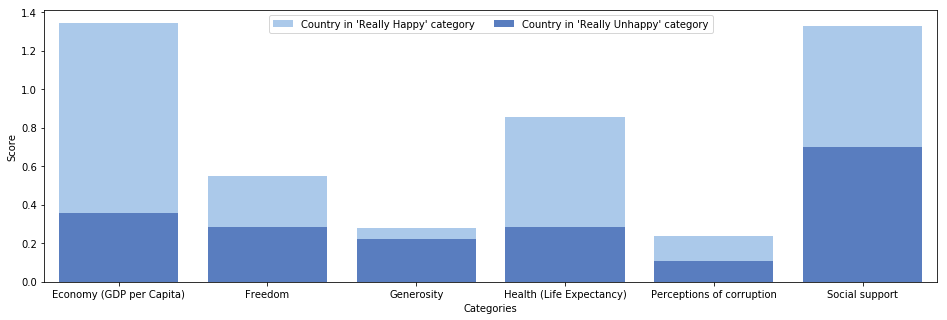

In [24]:
f, ax = plt.subplots(figsize=(16, 5))

sns.set_color_codes("pastel")
sns.barplot(x=dff.index,y=dff["Really Happy"], label="Country in 'Really Happy' category", color="b")

sns.set_color_codes("muted")
sns.barplot(x=dff.index,y=dff["Really Unhappy"], label="Country in 'Really Unhappy' category", color="b")

ax.legend(ncol=2, loc="upper center")
ax.set(ylabel="Score", xlabel="Categories")


On constate que pour les pays les moins heureux, le "social support"("family") a en moyenne une forte influence en comparaison des autres. 

En observant ce graphique, on peut remarquer que tous les paramètres du score sont doublés, ou plus, entre les pays très malheureux et les pays très heureux ; sauf pour un paramètre ! La "générosity" qui à elle peut bouger ! 
Peut-on en déduire une générosité plus développée dans les pays pauvres ? :) 